# Objective
##### What is the overall sales trend?
##### What are the top ten products by sales?
##### What are the most selling products?
##### Which is the most preferred ship mode?
##### Which are the most profitable category and sub-category?




<h4> Important required liabraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('superstore_sales.xlsx')


In [3]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
df.tail()


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [5]:
df.shape

(51290, 21)

In [6]:
# columns present in the dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [7]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [8]:
# check missing values
df.isnull()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51286,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [10]:
# getting descriptive statistics summary
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


<h2> Exploratory data analysis

<h5> what is the overall sales trend?

In [11]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [12]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [13]:
# getting month year from the dataset
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [14]:
df['month_year']


0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

In [16]:
df.groupby('month_year').sum()

C:\Users\91747\AppData\Local\Temp\ipykernel_10200\3082789721.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('month_year').sum()


,sales,quantity,discount,profit,shipping_cost,year
month_year,,,,,,
2011-01,98898.48886,1463,68.758,8321.80096,10544.78800,870763
2011-02,91152.15698,1224,52.252,12417.90698,10681.16300,760158
2011-03,145729.36736,1836,74.212,15303.56826,13096.18550,1083929
2011-04,116915.76418,2020,80.782,12902.32438,12954.52000,1134204
2011-05,146747.83610,2013,82.382,12183.82870,16443.20600,1138226
2011-06,215207.38022,3112,159.534,23415.24702,23813.10900,1844087
2011-07,115510.41912,1774,80.086,5585.00352,11844.47600,995445
2011-08,207581.49122,3035,121.462,23713.66772,22001.13600,1765658
2011-09,290214.45534,3707,137.678,35776.88394,29664.85100,2115572


In [20]:
# Grouping month year
df_trend = df.groupby('month_year').sum()['sales'].reset_index()

C:\Users\91747\AppData\Local\Temp\ipykernel_10200\43846726.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_trend = df.groupby('month_year').sum()['sales'].reset_index()


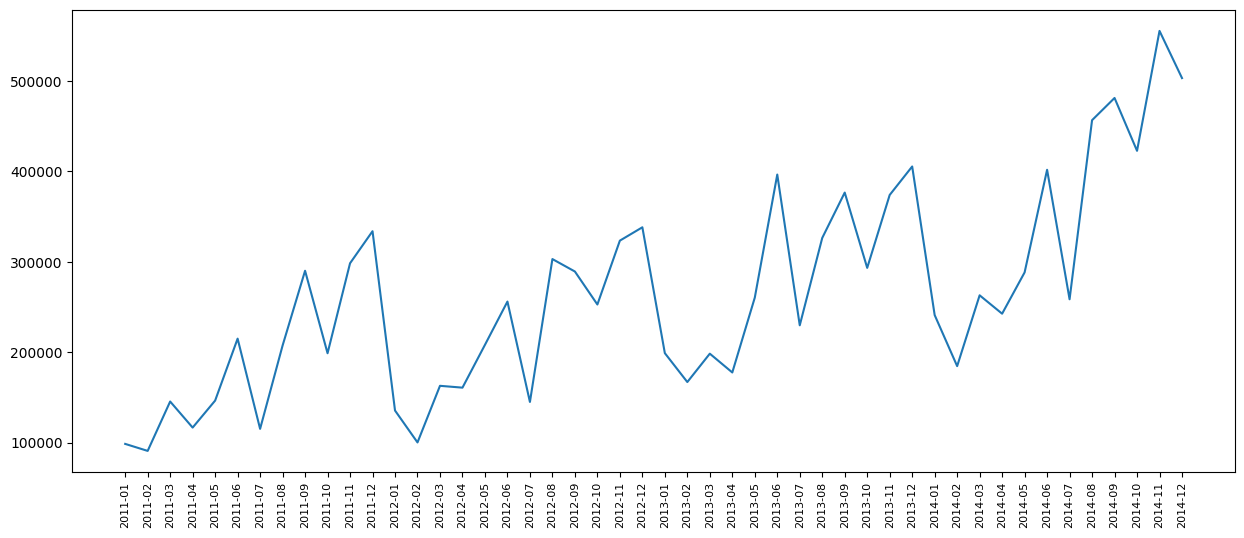

In [24]:
# setting the figure size
plt.figure(figsize=(15,6))
plt.plot(df_trend['month_year'], df_trend['sales'])
plt.xticks(rotation='vertical', size=8)
plt.show()

<h4> Which are the top 10 products by sale

In [26]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


In [27]:
df['product_name']

0                                    Tenex Lockers, Blue
1                               Acme Trimmer, High Speed
2                                Tenex Box, Single Width
3                            Enermax Note Cards, Premium
4                             Eldon Light Bulb, Duo Pack
                              ...                       
51285    Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl
51286            Wilson Jones Hole Reinforcements, Clear
51287             Hon Color Coded Labels, 5000 Label Set
51288             Hon Legal Exhibit Labels, Alphabetical
51289                                Bagged Rubber Bands
Name: product_name, Length: 51290, dtype: object

In [28]:
# grouping product name column
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

C:\Users\91747\AppData\Local\Temp\ipykernel_10200\1120336983.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])


In [33]:
# sorting prod_sales column
prod_sales = prod_sales.sort_values('sales', ascending=False)

In [34]:
prod_sales

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
...,...
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,7.7000
Grip Seal Envelopes,7.0720
Xerox 20,6.4800


In [35]:
prod_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


### Which are the most selling products

In [60]:
# grouping product name
df.groupby('product_name').sum()['quantity']

C:\Users\91747\AppData\Local\Temp\ipykernel_10200\1812305296.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('product_name').sum()['quantity']


product_name
"While you Were Out" Message Book, One Form per Page                                                    8
#10 Gummed Flap White Envelopes, 100/Box                                                               11
#10 Self-Seal White Envelopes                                                                          10
#10 White Business Envelopes,4 1/8 x 9 1/2                                                             32
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                37
                                                                                                       ..
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4    24
iOttie HLCRIO102 Car Mount                                                                             12
iOttie XL Car Mount                                                                                    14
invisibleSHIELD by ZAGG Smudge-Fr

In [61]:
most_sell_prod = pd.DataFrame(df.groupby('product_name').sum()['quantity'])

C:\Users\91747\AppData\Local\Temp\ipykernel_10200\2649797567.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_sell_prod = pd.DataFrame(df.groupby('product_name').sum()['quantity'])


In [64]:
most_sell_prod = most_sell_prod.sort_values('quantity', ascending=False)

In [66]:
most_sell_prod[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


### What is the most preferred ship mode


<AxesSubplot: xlabel='ship_mode', ylabel='count'>

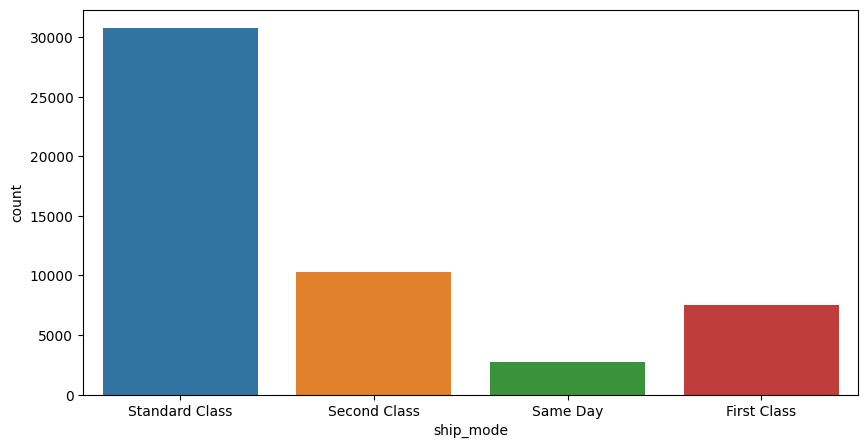

In [75]:
# Setting figure size
plt.figure(figsize=(10,5))

# plotting ship_mode
sns.countplot(x='ship_mode', data = df)

### Which are the most profitable category and sub-category

In [84]:
# grouping category and subcategory
cat_subcat_profit = pd.DataFrame(df.groupby(['category', 'sub_category']).sum(numeric_only=True)['profit'])

In [90]:
# sorting the result
cat_subcat_profit.sort_values(['category', 'profit'], ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870